In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Science содержит два больших отдела - статистическая обработка данных и машинное обучение. Статистическая обработка нацелена на 1) определение характеристик групп данных (медиана, среднее и т.п.) и 2) определение характеристик взаимодействия групп данных (корреляция). Другими словами, статистическая обработка требует понять данные. Машинное обучение нацелено на создание алгоритма, который позволит предсказывать целевой признак на основании заданных признаков в автоматизированном режиме.

Однако предваряет эти два больших отдела задача предварительной подготовки данных. В самом деле, если мы не подготовим наши данные, не уберем пропуски, дубликаты и т.п., то это повлияет на качество как статистической обработки, так и машинного обучения (или даже не позволит их выполнить). В этом разделе мы займемся именно подготовкой данных.

Рекомендуемая литература:

Рекомендуемые онлайн-ресурсы и прочее:
1) руководство по применению регулярных выражений https://developers.google.com/edu/python/regular-expressions
2)
N.B. Если где-то по тексту есть ссылка на онлайн-ресурс, то она также повторяется здесь.


Видео-версия находится здесь: https://www.youtube.com/watch?v=65ZFJ91_tHs&list=PLu3t5v5Z6x_ScpOxerTEkFblR5JRP2-QU&index=1&t=15s

Дополнительный полезный код, который может быть применен в том числе к задаче предварительной подготовке данных, можно также найти в разделе

Предупреждение об источнике данных. Источник данных находится здесь... Нам неизвестна процедура, которую применял автор для сбора данных. Поэтому всегда надо помнить, что особенности именно данного набора могут оказать влияние на наши выводы. Идеально было бы самостоятельно собрать данные или использовать дополнительно иные сборки данных, но пока в этой методичке мы такую задачу не ставим.

In [2]:
# скопируйте путь к файлу из проводника Windows, но замените \ на /
# error_bad_lines=False: если в строках есть ошибки, пропустим такие строки

data = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/data/books.csv', error_bad_lines=False) 

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
# смотрим данные

data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Мы видим, что данные можно разбить на две категории: сведения о книге (название, автор, isbn, язык, количество страниц, дата публикации и издательство) и сведения о реакции читателей (средний рейтинг, количество отзывов, количество оценок). Данные рассказывают нам не просто про книгу и не просто про реакцию на книгу, а про реакцию читателей, измеренную конкретными признаками, на книгу, также измеренную конкретными признаками. Если у нас нет специального задания по анализу, то мы можем наметить стратегию исследования уже из этого. Так, например, нам может быть интересно, каким книгам чаще ставят положительные оценки? как зависит оценка книги от количества страниц в ней? Давайте сформулируем общую для себя цель - изучить от чего зависит оценка книги. 

Таблица задает две оси: вертикальная - наблюдения, горизонтальная - признаки. Метка для наблюдений - индекс, метка для признаков - название признаков (название столбцов). Поэтому, естественно, наша подготовка данных должна начинаться с обследования меток. Однако индекс формируется автоматически в порядке возрастания от 0 до n (это поведение по умолчанию можно изменить, но мы здесь этого делать не будем). Названия столбцов были нам предоставлены вместе с данными, поэтому их-то мы отдельно и должны обследовать.

In [4]:
# смотрим названия столбцов, чтобы определить ошибки в них

data.columns 

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
# столбец '  num_pages' имеет лишние пробелы. Уберем их.
# Обратите внимание, что хорошей практикой является
# создание копии наших изначальных данных и дальнейшая работа
# только с такой копией

db = data.copy()
db = db.rename(columns = {'  num_pages' : 'num_pages'})

In [6]:
#проверим, что проблема устранена

db.columns 

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
#смотрим информацию о наших данных, чтобы определить тип объектов, отсутствие пропусков

db.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Мы видим, что у нас 12 признаков (нумерация начинается с 0 и продолжается до 11) и 11123 наблюдения (строки). Пропусков нет (количество объектов по столбцам одинаковое). Индекс у нас это RangeIndex. По типам данных заметно две проблемы. isbn помечен как объект, а isbn13 как int64. Кроме того, publication_date помечен как объект, хотя это очевидно дата. Изменим типы данных.

In [8]:
db['isbn13'] = db['isbn13'].astype('object') 

In [9]:
#мы используем errors, так как иначе выводится ошибка

db['publication_date'] = pd.to_datetime(db['publication_date'], errors='coerce') 

Часть данных в столбце publication_date изначально битые, поэтому надо использовать errors, чтобы их проигнорировать. Это возможно, так как таких данных мало. Проверим, что у нас получилось.

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  object        
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.0+ MB


Видим, что в publication_date у нас появилось два пропущенных значения. Мы это исправим.

In [11]:
#удаляем ошибочные даты

db = db.loc[~db['publication_date'].isin(['NaT'])] 

In [12]:
db.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn13              11121 non-null  object        
 6   language_code       11121 non-null  object        
 7   num_pages           11121 non-null  int64         
 8   ratings_count       11121 non-null  int64         
 9   text_reviews_count  11121 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11121 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Мы получили DatetimeIndex, что позволит нам анализировать временные ряды. И мы потеряли только 2 строки с неправильными датами. Теперь мы должны заняться дубликатами строк. Мы можем искать либо полные дубликаты (данные в каждом столбце для строки полностью совпадают), либо искать дубликаты выборочно. Здесь надо обратить внимание, что isbn является уникальным идентификатором каждой изданной книги. Поэтому логично искать дубликаты только по этим признакам, так как книги вполне могут совпадать по иным признакам и это нормально. 

In [13]:
db.duplicated(subset=['isbn13']).sum()

0

Дубликатов по isbn13 нет. Но все-таки посмотрим дубликаты по названию и имени автора.

In [14]:
#здесь показаны только строки, которые являются дубликатами 
# (первая строка, с которой сравниваются эти, не показана)

db[db.duplicated(subset=['title', 'authors', 'publication_date', 'publisher'])] 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3147,11557,Swan Song,Robert R. McCammon,4.28,0671741039,9780671741037,eng,956,46244,2540,1987-06-01,Pocket Books
3487,12683,The Shining,Stephen King/Campbell Scott,4.22,0743536991,9780743536998,eng,0,13,0,2005-08-02,Simon & Schuster Audio
5298,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9780743536950,en-US,0,56,5,2004-01-19,Simon & Schuster Audio
5797,21746,The Enemy (Jack Reacher #8),Lee Child/Dick Hill,4.16,1590864093,9781590864098,eng,14,4,0,2004-05-11,Brilliance Audio
5805,21759,Tripwire (Jack Reacher #3),Lee Child/Dick Hill,4.09,1593555601,9781593555603,eng,14,11,1,2004-11-25,Brilliance Audio
5806,21763,Tripwire (Jack Reacher #3),Lee Child/Dick Hill,4.09,1593357389,9781593357382,eng,14,18,4,2004-11-25,Brilliance Audio
5807,21764,The Enemy (Jack Reacher #8),Lee Child/Dick Hill,4.16,1593353154,9781593353155,eng,14,1,0,2004-06-10,Brilliance Audio
6342,23894,Cien años de soledad,Gabriel García Márquez,4.07,0307350274,9780307350275,spa,512,52,7,2006-02-07,Plaza y Janes
9249,36303,'Salem's Lot,Stephen King,4.02,0451139690,9780451139696,eng,427,186,22,1976-08-01,Signet
9756,39028,The Wheel of Darkness (Pendergast #8),Douglas Preston/Lincoln Child,3.93,0446580287,9780446580281,eng,388,21797,1002,2007-08-28,Grand Central Publishing


Такой подход позволяет нам понять, почему могут совпадать имя автора и название при различных isbn. Мы видим, что, как правило, такие дубликаты - это аудиокниги. С этим нам придется разобраться отдельно. Для начала посмотрим, есть ли нулевое количество страниц у книг. 

In [15]:
db[db['num_pages'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,Moody Publishers
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,2003-01-01,Tantor Media
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,2006-10-03,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,2003-10-01,Simon & Schuster Audio
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10026,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,2005-01-01,Tantor Media
10188,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,Random House Value Publishing
10620,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,1999-12-01,Simon & Schuster Audio
10922,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,1981-10-12,Ivy Books


Видим, что таких книг 76. Что их объединяет? Посмотрим издательства. 

In [16]:
db[db['num_pages'] == 0]['publisher'].value_counts()

Random House Audio                     19
Tantor Media                            5
Simon & Schuster Audio                  5
Random House Value Publishing           4
Macmillan Audio                         4
Random House Audio Publishing Group     3
Grand Central Publishing                3
Listening Library (Audio)               2
RH Audio                                2
Audiogo                                 2
Basic Books                             2
Ivy Books                               2
RH Audio Price-less                     1
Scholastic Audio Books                  1
Mariner Books                           1
HarperCollins Publishers                1
Audio Renaissance                       1
HarperAudio                             1
Turtleback Books                        1
Ballantine Books                        1
Gold Eagle                              1
Planeta Publishing                      1
Fawcett Coventry                        1
Schocken                          

Видим, что в основном это издательства, которые выпускают аудиокниги. Это логично. Если у книги нет страниц, то это просто аудиокнига. Но посмотрим количество страниц для тех книг, которые выпускали эти издательства.

In [17]:
#здесь мы сначала переводим все буквы в названии 
#в нижний регистр, а затем ищем совпадение

db[db['publisher'].str.lower().str.contains('audio')]['num_pages'].sort_values(ascending=False) 

7511    1162
5845     473
5849     447
2102     368
4841     356
        ... 
7014       0
7443       0
7612       0
5298       0
7611       0
Name: num_pages, Length: 181, dtype: int64

Итак, мы видим, что аудиоиздательства издают нечто, что имеет страницы, даже 1162 страницы! Посмотрим на это.

In [18]:
db[db['num_pages'] == 1162]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
7511,28845,The Story of Philosophy,Will Durant/Grover Gardner,4.12,1572704209,9781572704206,eng,1162,31,4,2004-09-20,AudioGO


В интернете, например на сайте Amazon, можно обнаружить эту книгу. И это оказывается аудиокнигой! Таким образом, количество "страниц" еще не говорит нам, что это бумажная книга. Это может быть, например, вес дисков. Более верный признак - это именно издательство. Как же мы поступим? Ведь сравнивать книги аудио и бумажные по количеству страниц у нас не получится. Получается, что в одном признаке у нас смещаны различные числа - количество страниц и вес дисков. Мы удалим все аудиокниги, но сначала сравним оценки по бумажным и аудиокнигам.

In [19]:
#если условие выполняется, то audio, если нет, то paper

db['kind_book'] = np.where(db['publisher'].str.lower().str.contains('audio'), 'audio', 'paper') 

In [20]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,kind_book
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,paper
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,paper
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,paper
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,paper
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,paper


Text(0.5, 1.0, 'Средняя оценка для бумажных и аудиокниг')

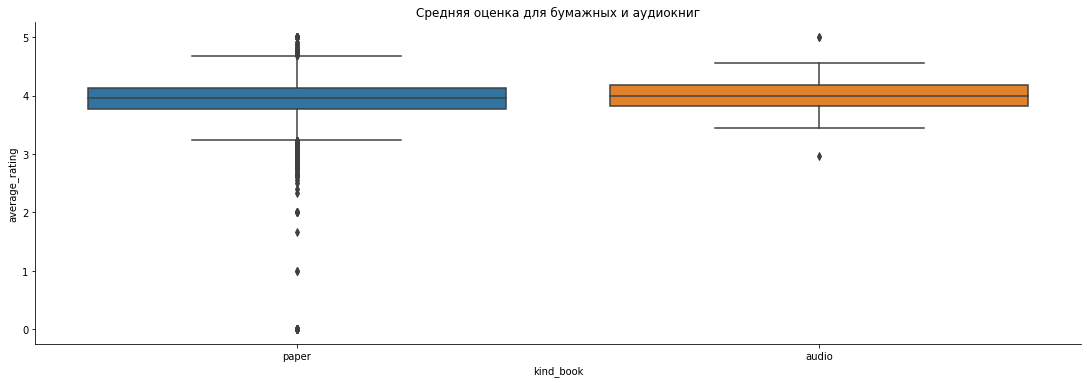

In [21]:
g = sns.catplot(data = db, x = 'kind_book', y = 'average_rating', kind='box', aspect=3)
plt.title('Средняя оценка для бумажных и аудиокниг')

Видим, что медиана не отличается, хотя разброс оценок для бумажных книг больше, чем для аудиокниг. Удалим вспомогательный признак, а также все аудиокниги. Надо учитывать, что такой подход, когда мы сравниваем две категории книг по графикам, является довольно грубым. Здесь бы стоило применить, например, t-тест. Но у нас нет специальной задачи исследовать аудио и бумажные книги, поэтому ограничимсы графиками. 

In [22]:
db = db.drop('kind_book', axis=1)
db = db[~db['publisher'].str.lower().str.contains('audio')]

In [23]:
db.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


Еще раз посмотрим на таблицу, но выберем только количество страниц до 10. Посмотрим издательства.

In [24]:
db[db['num_pages'] < 10]['publisher'].value_counts()

Caedmon                              6
Tantor Media                         6
Grand Central Publishing             5
Random House Value Publishing        4
Recorded Books  Inc.                 3
HarperFestival                       3
Mariner Books                        3
Little  Brown & Company              3
Puffin                               2
Hay House                            2
Basic Books                          2
Ivy Books                            2
HighBridge Company                   2
HarperCollins Publishers             2
Listening Library                    2
Planeta Publishing                   1
Knopf                                1
Recorded Books                       1
Warner Adult                         1
Sounds True                          1
Knowledge Products                   1
BBC Worldwide                        1
Prentice Hall                        1
Zondervan                            1
Penguin-HighBridge                   1
Schocken                 

Замечаем, что у нас есть издательство Listening Library и ряд других, которые очевидно выпускают аудиокниги. Приходим к выводу, что книги с количеством страниц 10 это аудиокниги. Удалим их.

In [25]:
db = db[db['num_pages'] > 10]

In [26]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10862 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              10862 non-null  int64         
 1   title               10862 non-null  object        
 2   authors             10862 non-null  object        
 3   average_rating      10862 non-null  float64       
 4   isbn                10862 non-null  object        
 5   isbn13              10862 non-null  object        
 6   language_code       10862 non-null  object        
 7   num_pages           10862 non-null  int64         
 8   ratings_count       10862 non-null  int64         
 9   text_reviews_count  10862 non-null  int64         
 10  publication_date    10862 non-null  datetime64[ns]
 11  publisher           10862 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Раз уж мы начали дополнять нашу таблицу признаками, то давайте добавим еще два: десятилетие, в котором вышла книга, квартал, в котором вышла книга. Здесь мы уже конструируем признаки, исходя из целей исследования. Специальных целей перед нами не ставили, мы ищим их для себя сами. Нас будет интересовать как распределяются книги по десятилетиям и в какой квартал их чаще выпускают. Почему именно эти признаки? Потому что десятилетия отражают развитие рынка книготорговли, изменение форматов и т.п. Кварталы же зависят от праздников, сезонности, что также может оказывать влияние на книги.

Обратите внимание, что конструирование признаков возможно двумя путями: 1) вы самостоятельно определяете новый признак, 2) признаки совпадаются автоматически, например простым возведением каждого числового признака в квадрат или перемножением каждой пары таких признаков. Если вы затрудняетесь самостоятельно определить признаки, которые вам было бы интересно изучить, то можно будет применить второй метод. В этом случае можно и не создавать признаки на этапе обработки данных, можно использовать специальные методы, например полиномиальную регрессию. 

In [27]:
db.loc[ : , "decade"] = 10 * (db.loc[ : , "publication_date"].dt.year // 10)
db.loc[ : , 'quarter'] = db.loc[ : , 'publication_date'].dt.quarter 

In [28]:
db.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3


Теперь посмотрим на признак authors. Мы видим, что здесь есть случаи, когда указано несколько имен через /. Сколько таких случаев?

In [29]:
db[db['authors'].str.contains('/')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3
24,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,0618260587,9780618260584,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,2003-08-15,Editorial Presença,2000,3
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,2003-04-08,Editorial Presença,2000,2
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,2004-09-01,Editorial Presença,2000,3
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,2003-10-11,Editorial Presença,2000,4


4358 случай это много. Из примеров мы видим, что это как правило указаны переводчики. Однако возможны и другие ситуации. Это могут быть соавторы или вариант написания имени. Без дополнительного исследования внешних источников мы этого определить не можем. В этой ситуации мы можем сделать следующее. Заменим слеш на запятую. Создадим колонку tra_co (переводчик или соавтор) и присвоим 1 тем случаям, где есть запятая, и 0 остальным. 

In [30]:
db['authors'] = db['authors'].str.replace('/', ',')
db['tra_co'] = np.where(db['authors'].str.contains(','), 1, 0)

In [31]:
db.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1


Теперь разберемся с книгами, у которых слишком большие значения количества страниц. Посмотрим на них поближе.

<AxesSubplot:>

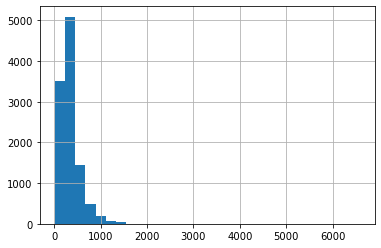

In [32]:
db['num_pages'].hist(bins=30)

In [33]:
db[db['num_pages'] > 1000]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12,Scholastic,2000,3,0
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,2012-09-25,Ballantine Books,2010,3,0
22,31,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0618517650,9780618517657,eng,1184,1710,91,2004-10-21,Houghton Mifflin Harcourt,2000,4,0
24,35,The Lord of the Rings (The Lord of the Rings ...,"J.R.R. Tolkien,Alan Lee",4.50,0618260587,9780618260584,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,42932,Whirlwind (Asian Saga #6),James Clavell,3.82,0340766182,9780340766187,eng,1231,5626,164,1999-12-02,Morrow,1990,4,0
10543,42986,War and Remembrance (The Henry Family #2),Herman Wouk,4.41,0316954993,9780316954990,eng,1042,29555,680,2002-02-05,Back Bay Books,2000,1,0
10749,43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,0812575601,9780812575606,en-US,2480,4196,81,1998-11-15,Tor Books,1990,4,0
10906,44613,Remembrance of Things Past (Boxed Set),"Marcel Proust,C.K. Scott Moncrieff,Frederick A...",4.34,0701125594,9780701125592,eng,3400,6,1,1981-03-05,Chatto & Windus,1980,1,1


Видим, что, как правило, книги с количеством страниц больше 1000 это многотомные издания. Очевидно, что просот убрать такие книги, как мы сделали с книгами, у которых было 0 страниц, мы не можем. Что же тогда? Мы должны найти все такие книги и пометить их. Для этого мы должны определить маркеры, которые позволят найти многотомные издания. Уже представленный выше список дает идеи:
1) книги с наличием знака #
2) книги со словами Boxed Set

Кроме того, под подозрением все книги со словами "books", "vol.", "volume", "series"

. См. хорошее руководство по регулярным выражениям (https://developers.google.com/edu/python/regular-expressions)

In [34]:
import re

# если книга является многотомной, то указываем 1, 
# если не является многотомной, то указываем 0

db['multivolume'] = np.where(
    db['title'].str.contains('#|boxed|books|volume|series|vol.', flags=re.IGNORECASE), 1, 0
    )

In [35]:
db.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co,multivolume
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1,1
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2,1,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1,1


In [36]:
db['average_rating'].describe()

count    10862.000000
mean         3.933448
std          0.348318
min          0.000000
25%          3.770000
50%          3.960000
75%          4.130000
max          5.000000
Name: average_rating, dtype: float64

Мы видим, что минимальная оценка это 0. Но на сайте нельзя поставить такую оценку. Поэтому 0 означает отсутствие оценки, то есть это категориальный признак, который "пробрался" в числовой. Посмотрим количество и удалим, так как такое смешение недопустимо. Однако, если оценка 0, но количество оценок не 0, то у нас просто ошибка. Проверим этом.

In [37]:
db[(db['average_rating'] == 0) & (db['ratings_count'] > 0)] 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co,multivolume


In [38]:
db[db['average_rating'] == 0]['average_rating'].count()

24

In [39]:
db = db[db['average_rating'] != 0]

In [40]:
#проверим какое минимальное значение у нас теперь

db['average_rating'].min() 

1.0

In [41]:
db.head() 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,decade,quarter,tra_co,multivolume
0,1,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling,Mary GrandPré",4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2000,3,1,1
1,2,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling,Mary GrandPré",4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2000,3,1,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2000,4,0,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling,Mary GrandPré",4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2000,2,1,1
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,"J.K. Rowling,Mary GrandPré",4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2000,3,1,1


In [42]:
#удалим признаки, которые нам больше не пригодятся

db = db.drop(['bookID', 'isbn', 'isbn13', 'authors', 'publication_date', 'publisher'], axis=1) 

In [43]:
db

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,decade,quarter,tra_co,multivolume
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2000,3,1,1
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2000,3,1,1
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,2000,4,0,1
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2000,2,1,1
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,2000,3,1,1
...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,4.06,eng,512,156,20,2000,4,1,1
11119,You Bright and Risen Angels,4.08,eng,635,783,56,1980,4,0,0
11120,The Ice-Shirt (Seven Dreams #1),3.96,eng,415,820,95,1990,3,0,1
11121,Poor People,3.72,eng,434,769,139,2000,1,0,0


Что же у нас получилось по признакам? У нас есть числовые признаки, например num_pages или text_reviews_count. Есть категориальный language_code. Но что с остальными? title, authors и publisher это скорее идентификационные данные для каждой книги, чем признаки.

In [45]:
#сохраним обработанные данные
# укажем index=False, чтобы при сохранении не был создан дублирующий индекс

db.to_csv('gd_clean_data.csv', index=False) 